In [ ]:
# Do not use this code under normal circumstances and every time 
%pip install opencv-python matplotlib pillow

In [ ]:
!pip list # Do not use this code under normal circumstances and every time

In [1]:
import tensorflow as tf # type: ignore
import os

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [2]:
# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs Available: ", len(gpus))
    print("GPU Details: ", gpus)
else:
    print("No GPUs Available.")

GPUs Available:  1
GPU Details:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Check CPU availability
cpu = tf.config.list_physical_devices('CPU')
if gpus:
    print("CPUs Available: ", len(cpu))
    print("CPU Details: ", cpu)
else:
    print("No CPUs Available.")

CPUs Available:  1
CPU Details:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [2]:
import cv2 # type: ignore
import imghdr # type: ignore
from matplotlib import pyplot as plt # type: ignore

In [5]:
# Define the directory containing your training data
data_dir = r'Training_NOTUMOR'  # Adjust the path as necessary

# List the classes (subdirectories)
class_names = os.listdir(data_dir)
print("Class names:", class_names)  # This will print the names of the classes (0-9)

# Create a list to hold image paths and labels
image_paths = []
labels = []

# Loop through each class directory
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)


Class names: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [6]:
image_exts = ['jpeg','jpg','bmp','png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list Training_NOTUMOR\notumor\Tr-no_1001.jpg


In [8]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [3]:
import numpy as np # type: ignore
from matplotlib import pyplot as plt # type: ignore

In [10]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=32, label_mode='int') # the smaller batch size the better. the greater batch size the faster. the ideal batch size is 32

Found 5711 files belonging to 4 classes.


In [11]:
# Assuming 'data' is your dataset
data_iterator = data.as_numpy_iterator()

In [12]:
#get another batch from the iterator
batch = data_iterator.next()

In [13]:
# images as numpy arrays
batch[0].shape # Should print something like (256, height, width, channels)

(32, 256, 256, 3)

In [14]:
# Class 0 = Glioma 
# Class 1 = meningioma
# Class 2 = NoTumor
# Class 3 = Pituitary
batch[1] # Should print the labels for the 256 images

array([3, 1, 3, 1, 1, 3, 1, 1, 3, 2, 1, 1, 2, 3, 1, 3, 3, 1, 3, 2, 2, 0,
       2, 0, 3, 2, 2, 3, 2, 0, 0, 1])

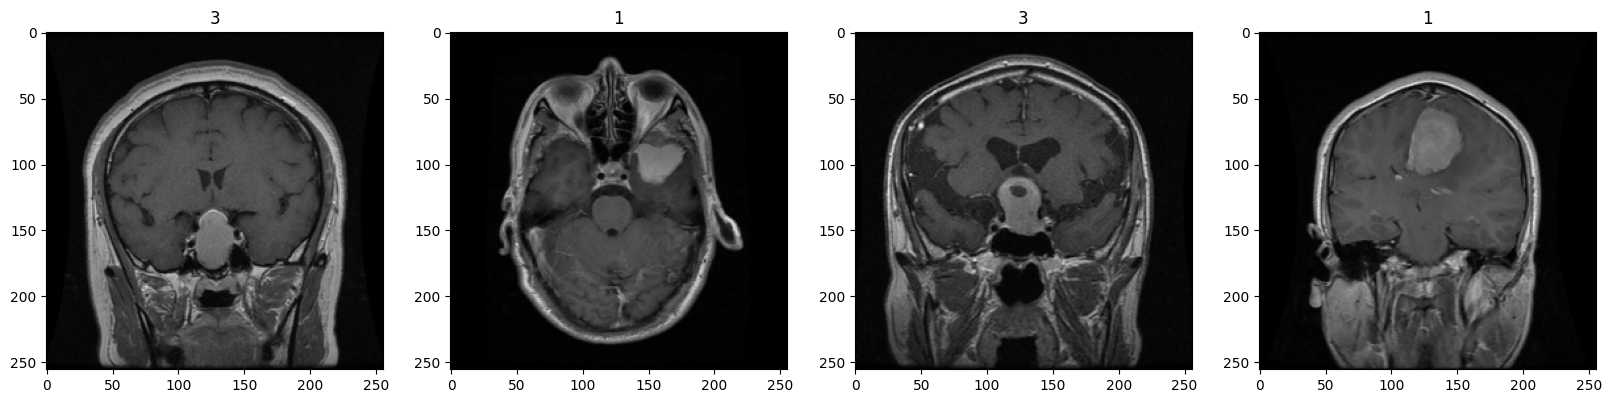

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
scaled = batch[0] / 255

In [17]:
scaled.max()

1.0

In [18]:
scaled.min()

0.0

In [20]:
if batch[0].max() == 255:
    data = data.map(lambda x, y: (x / 255, y))
    batch = data.as_numpy_iterator().next()
    print('have been changed')
    print('batch[0].max() = ' + str(batch[0].max()))
    print('batch[0].min() = ' + str(batch[0].min()))
else:
    print('no changes')
    print('batch[0].max() = ' + str(batch[0].max()))
    print('batch[0].min() = ' + str(batch[0].min()))

no changes
batch[0].max() = 1.0
batch[0].min() = 0.0


In [21]:
scaled_iterator = data.as_numpy_iterator()

In [22]:
batch = scaled_iterator.next()

In [23]:
batch[0].max()

1.0

In [24]:
batch[0].min()

0.0

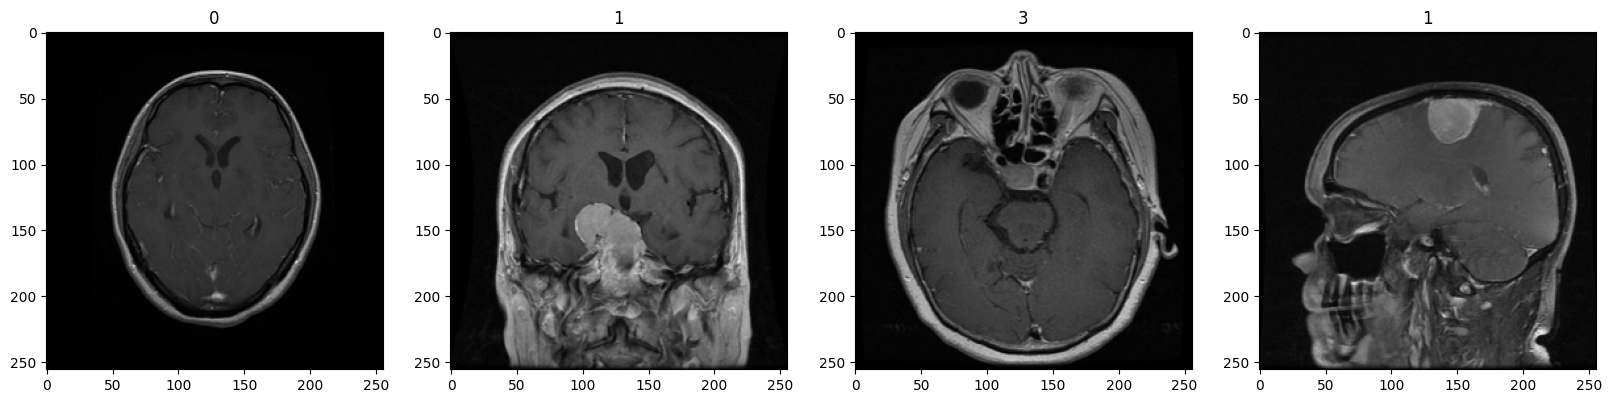

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [26]:
len(data)

179

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)+1
test_size = int(len(data)*0.2)+1

In [28]:
train_size + val_size + test_size

179

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [30]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='sigmoid'))


In [33]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [35]:
from datetime import datetime

# Get the current date and time
current_date = datetime.now()

# Format the date string with microseconds
formatted_date = current_date.strftime('%d.%h.%Y') + '.' + current_date.strftime('(%H.%M.%S)') + '.' + str(current_date.microsecond)

print("Formatted date with microseconds:", formatted_date)

Formatted date with microseconds: 31.Dec.2024.(09.45.51).401990


In [36]:
logdir = fr'C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1\logs\MultiClassificationTraining _WithNOTUMOR({str(formatted_date)})' # change it to any log file if u were working on this file

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
batch[0].max()

1.0

In [39]:
batch[0].min()

0.0

In [40]:
hist = model.fit(train, epochs=32, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/32
125/125 [==============================] - 27s 98ms/step - loss: 0.7835 - accuracy: 0.6923 - val_loss: 0.5009 - val_accuracy: 0.8090
Epoch 2/32
125/125 [==============================] - 12s 95ms/step - loss: 0.3973 - accuracy: 0.8485 - val_loss: 0.4540 - val_accuracy: 0.8142
Epoch 3/32
125/125 [==============================] - 12s 95ms/step - loss: 0.2897 - accuracy: 0.8942 - val_loss: 0.2590 - val_accuracy: 0.9045
Epoch 4/32
125/125 [==============================] - 12s 98ms/step - loss: 0.1982 - accuracy: 0.9290 - val_loss: 0.2711 - val_accuracy: 0.9010
Epoch 5/32
125/125 [==============================] - 12s 94ms/step - loss: 0.1404 - accuracy: 0.9525 - val_loss: 0.2355 - val_accuracy: 0.9219
Epoch 6/32
125/125 [==============================] - 12s 94ms/step - loss: 0.0848 - accuracy: 0.9672 - val_loss: 0.2678 - val_accuracy: 0.9149
Epoch 7/32
125/125 [==============================] - 12s 94ms/step - loss: 0.0520 - accuracy: 0.9835 - val_loss: 0.2820 - val_accuracy:

In [41]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

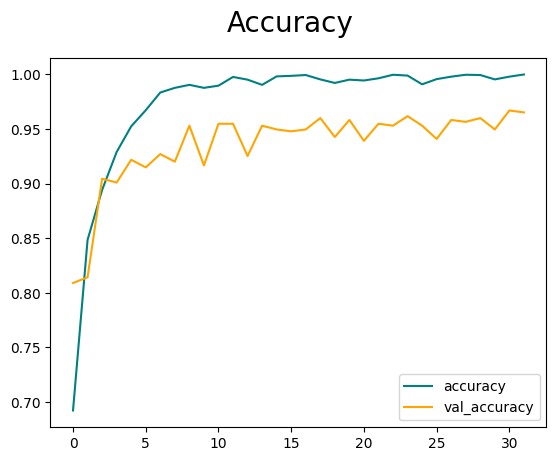

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right") # 4 options: lower left, lower right, upper left, upper right
plt.show()

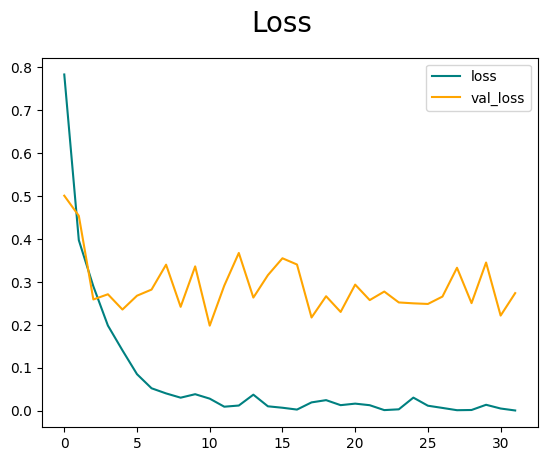

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right") # 4 options: lower left, lower right, upper left, upper right
plt.show()

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # type: ignore

In [45]:
Precision = Precision()
Recall = Recall()
BinAccuracy = BinaryAccuracy()

In [46]:
len(test)

36

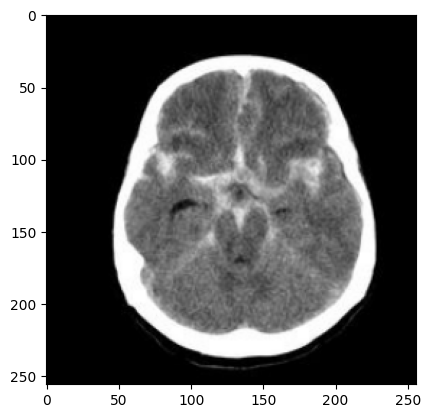

1/1 [==============================] - 0s 20ms/step
Model Prediction: [[5.2931262e-14 1.0000000e+00 1.0000000e+00 2.8416436e-14]]


In [62]:
# Load the image
image_path = fr"Testing_NOTUMOR/notumor/Te-no_0011.jpg"  # Replace with the path to your image
img = cv2.imread(image_path)

# Check if the image is loaded correctly
if img is None:
    raise ValueError(f"Image not found or invalid at path: {image_path}")

# Convert BGR (OpenCV default) to RGB for proper visualization
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image using TensorFlow
resize = tf.image.resize(img, (256, 256))

# Visualize the resized image
plt.imshow(resize.numpy().astype(int))  # Convert to int for visualization
plt.show()

# Normalize the resized image and expand dimensions for prediction
model_input = np.expand_dims(resize.numpy().astype("float32") / 255.0, axis=0)

# Predict using the model
yhat = model.predict(model_input)

# Output the prediction
print("Model Prediction:", yhat)

In [63]:
yhat

array([[5.2931262e-14, 1.0000000e+00, 1.0000000e+00, 2.8416436e-14]],
      dtype=float32)

In [64]:
# Get the class with the highest prediction probability
predicted_class = tf.argmax(yhat, axis=1).numpy()[0]

# Map the predicted class index to your custom labels
label_map = {0: "Glioma", 1: "Meningioma", 2: "NoTumor", 3: "Pituitary"}  # Adjust the index if necessary based on your data setup

# Determine the predicted label
predicted_label = label_map.get(predicted_class, "Unknown")

# Output the result based on the predicted label
if predicted_label == "Glioma":
    print(f"Image has been Classified as Class 0 (Glioma Detected)")
elif predicted_label == "Meningioma":
    print(f"Image has been Classified as Class 1 (Meningioma Detected)")
elif predicted_label == "NoTumor":
    print(f"Image has been Classified as Class 2 (NoTumor Detected)")
elif predicted_label == "Pituitary":
    print(f"Image has been Classified as Class 3 (Pituitary Detected)")
else:
    print("Prediction Error: Unknown class label.")

Image has been Classified as Class 1 (Meningioma Detected)


In [65]:
from tensorflow.keras.models import load_model # type: ignore
from datetime import datetime
#import os
#import tensorflow as tf

In [66]:
from datetime import datetime

num_epochs = len(hist.epoch)

# Get the current date and time
current_date = datetime.now()

# Format the date string with microseconds
formatted_date = current_date.strftime('%d.%h.%Y') + '.' + current_date.strftime('%H.%M.%S') + '.' + str(current_date.microsecond)

print("Formatted date with microseconds:", formatted_date)
print("len(hist.epochs) = " + str(num_epochs))

Formatted date with microseconds: 31.Dec.2024.09.57.39.184201
len(hist.epochs) = 32


In [67]:
model.save(os.path.join(r'models',f'4Classes_{formatted_date}_{num_epochs}epochs.h5')) # choose the dir that u want to save ur model at

In [68]:
new_model = load_model(os.path.join(r'models', fr'4Classes_31.Dec.2024.09.57.39.184201_32epochs.h5')) # choose the dir that u want to load ur model from

In [69]:
yhattest = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 102ms/step


In [70]:
# Get the class with the highest prediction probability
predicted_class_test = tf.argmax(yhattest, axis=1).numpy()[0]

# Map the predicted class index to your custom labels
label_map = {0: "Glioma", 1: "Meningioma", 2: "NoTumor", 3: "Pituitary"}  # Adjust the index if necessary based on your data setup

# Determine the predicted label
predicted_label_test = label_map.get(predicted_class_test, "Unknown")

# Output the result based on the predicted label
if predicted_label_test == "Glioma":
    print(f"Image has been Classified as Class 0 (Glioma Detected)")
elif predicted_label_test == "Meningioma":
    print(f"Image has been Classified as Class 1 (Meningioma Detected)")
elif predicted_label_test == "NoTumor":
    print(f"Image has been Classified as Class 2 (NoTumor Detected)")
elif predicted_label_test == "Pituitary":
    print(f"Image has been Classified as Class 3 (Pituitary Detected)")
else:
    print("Prediction Error: Unknown class label.")

Image has been Classified as Class 1 (Meningioma Detected)


In [73]:
import pandas as pd # type: ignore

# Extracting the metrics
epochs = range(1, len(hist.history['accuracy']) + 1)
accuracy = hist.history['accuracy']
validation_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
validation_loss = hist.history['val_loss']

# Creating a DataFrame with the desired columns
df = pd.DataFrame({
    'Epochs': epochs,
    'Accuracy': accuracy,
    'Validation Accuracy': validation_accuracy,
    'Loss': loss,
    'Validation Loss': validation_loss
})

# Saving the DataFrame to a CSV file
df.to_csv(rf'4ClassesFirstModel.csv', index=False)

In [7]:
def predictFolderTumorClasses(folder_path, model, class_names):
    """
    Predict the class of each image in the folder and calculate statistics.

    Args:
    folder_path (str): Path to the folder containing subfolders for each class.
    model (tf.keras.Model): Trained model for brain tumor classification.
    class_names (list): List of class names (e.g., ['glioma', 'meningioma', 'pituitary']).

    Returns:
    dict: Accuracy and false positive statistics for each class.
    """
    results = {class_name: {"true_positive": 0, "false_positive": 0, "total": 0} for class_name in class_names}

    # Iterate over subfolders for each class
    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.exists(class_folder):
            print(f"Folder for {class_name} not found.")
            continue

        files = os.listdir(class_folder)
        for file in files:
            file_path = os.path.join(class_folder, file)
            
            # Read the image
            img = cv2.imread(file_path)
            if img is None:
                continue

            # Resize the image
            resize = tf.image.resize(img, (256, 256))

            # Normalize and expand dimensions
            img_expanded = np.expand_dims(resize / 255.0, axis=0)

            # Make a prediction
            predictions = model.predict(img_expanded)
            predicted_class = np.argmax(predictions)

            # Update statistics
            if predicted_class == class_names.index(class_name):
                results[class_name]["true_positive"] += 1
            else:
                results[class_names[predicted_class]]["false_positive"] += 1
            results[class_name]["total"] += 1

    # Calculate and print statistics with the true and false counts
    for class_name in class_names:
        if results[class_name]["total"] > 0:
            accuracy = (results[class_name]["true_positive"] / results[class_name]["total"]) * 100
        else:
            accuracy = 0
        print(f"{class_name} - Total Images: {results[class_name]['total']}")
        print(f"{class_name} - True Positives: {results[class_name]['true_positive']}")
        print(f"{class_name} - False Positives: {results[class_name]['false_positive']}")
        print(f"{class_name} - Accuracy: {accuracy:.2f}%")
        print()

    return results

# Define the folder path and class names
folder_path = r"C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1\Testing with the old dataset"
class_names = ['glioma', 'meningioma', 'notumor','pituitary']

# Load your trained model
model = tf.keras.models.load_model('models/4Classes_31.Dec.2024.09.57.39.184201_32epochs.h5')

# Test the dataset
results = predictFolderTumorClasses(folder_path, model, class_names)


1/1 [==============================] - 0s 23ms/step
glioma - Total Images: 100
glioma - True Positives: 14
glioma - False Positives: 3
glioma - Accuracy: 14.00%

meningioma - Total Images: 115
meningioma - True Positives: 96
meningioma - False Positives: 48
meningioma - Accuracy: 83.48%

notumor - Total Images: 105
notumor - True Positives: 93
notumor - False Positives: 82
notumor - Accuracy: 88.57%

pituitary - Total Images: 74
pituitary - True Positives: 48
pituitary - False Positives: 10
pituitary - Accuracy: 64.86%



In [5]:
import tensorflow as tf

# Load the model from the .h5 file
model = tf.keras.models.load_model(fr'C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1\models\4Classes_31.Dec.2024.09.57.39.184201_32epochs.h5')

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = r'C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1\Testing\meningioma\Te-me_0040.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(256, 256))  # Resize to match model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize image (assuming this is how your model was trained)

In [33]:
def generate_gradcam_heatmap(model, img_array, target_layer_name):
    # Get the last convolutional layer
    last_conv_layer = model.get_layer(target_layer_name)
    
    # Create a model that outputs both the predictions and the last conv layer's output
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [last_conv_layer.output, model.output]
    )
    
    # Model prediction and class index
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        tape.watch(conv_outputs)
        class_idx = tf.argmax(predictions[0])
        class_channel = predictions[:, class_idx]
    
    # Gradient calculation
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute weighted sum of feature maps
    conv_outputs = conv_outputs[0].numpy()
    pooled_grads = pooled_grads.numpy()
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]
    
    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # Remove negative values
    heatmap = heatmap / np.max(heatmap)  # Normalize to [0, 1]
    
    return heatmap


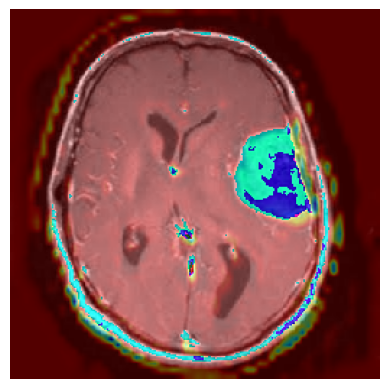

In [34]:
import matplotlib.pyplot as plt
import cv2

# Generate the heatmap for the last convolutional layer (update layer name if needed)
heatmap = generate_gradcam_heatmap(model, img_array, 'conv2d_2')  # Replace 'conv2d_2' with your layer name

# Resize the heatmap to match the original image size
heatmap_resized = cv2.resize(heatmap, (img.size[0], img.size[1]))

# Convert heatmap to color map (jet)
heatmap_colored = np.uint8(255 * heatmap_resized)
heatmap_colored = cv2.applyColorMap(heatmap_colored, cv2.COLORMAP_JET)

# Overlay the heatmap on the original image
img_array = np.array(img)
superimposed_img = heatmap_colored * 0.4 + img_array
superimposed_img = np.uint8(superimposed_img)

# Display the result
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()


In [1]:
!pip install dacite